In [ ]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error ,r2_score, explained_variance_score
from sklearn import metrics

plt.style.use("bmh")

In [ ]:
#load the dataset
from google.colab import files
file = files.upload()


In [ ]:
#store the data into a data frame
df = pd.read_csv('AAPL.csv')
#print first 10 rows of the dataset
df.head(10)

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,7/30/18,47.974998,48.049999,47.267502,47.477501,45.373070,84118000
1,AAPL,7/31/18,47.575001,48.035000,47.334999,47.572498,45.463867,157492000
2,AAPL,8/1/18,49.782501,50.439999,49.327499,50.375000,48.142143,271742800
3,AAPL,8/2/18,50.145000,52.095001,50.087502,51.847500,49.549374,249616000
4,AAPL,8/3/18,51.757500,52.185001,51.369999,51.997501,49.692730,133789600
5,AAPL,8/6/18,52.000000,52.312500,51.767502,52.267502,49.950764,101701600
6,AAPL,8/7/18,52.330002,52.375000,51.689999,51.777500,49.482479,102349600
7,AAPL,8/8/18,51.512501,51.952499,51.130001,51.812500,49.515930,90102000
8,AAPL,8/9/18,52.382500,52.445000,51.799999,52.220001,49.905373,93970400
9,AAPL,8/10/18,51.840000,52.275002,51.667500,51.882500,49.756714,98444800


In [ ]:
#get the number of trading days
df.shape

(1258, 8)

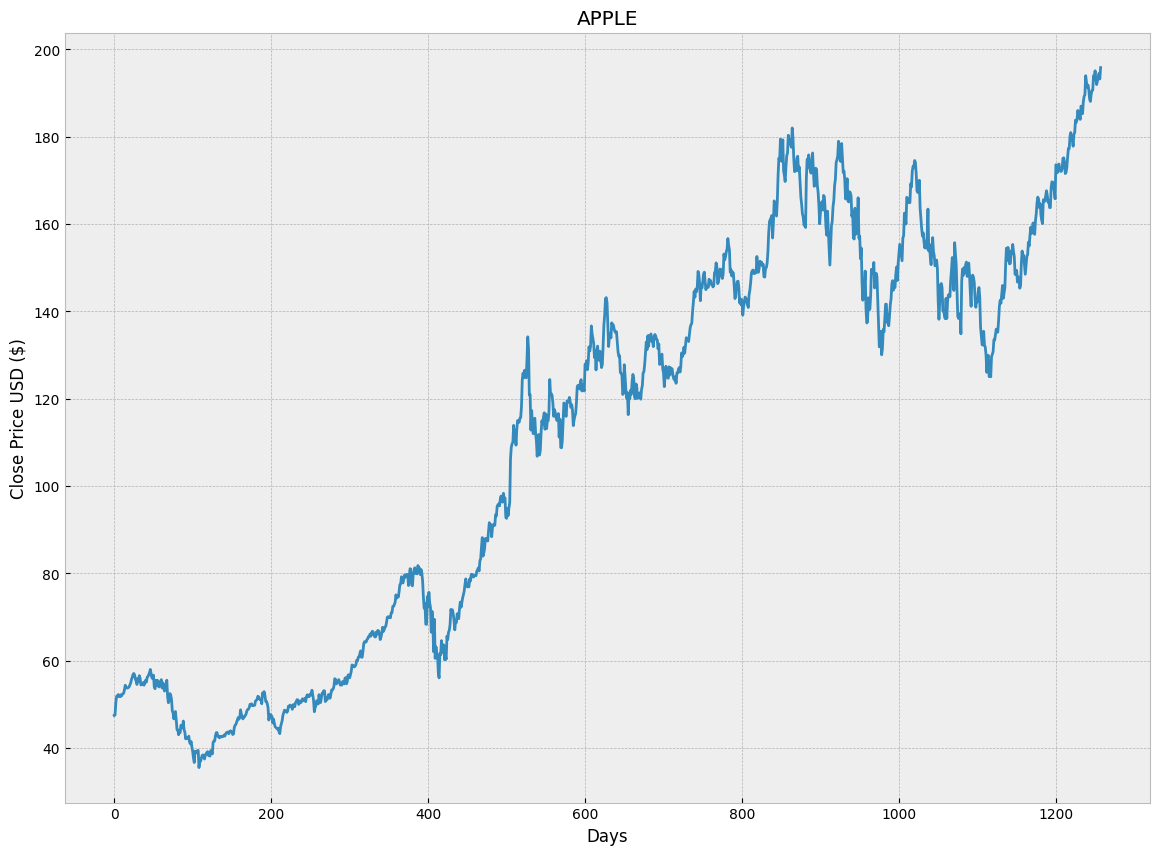

In [ ]:
 #visualize the close price data
 plt.figure(figsize=(14,10))
 plt.title('APPLE')
 plt.xlabel('Days')
 plt.ylabel('Close Price USD ($)')
 p = plt.plot(df['Close'])
 plt.show()

In [ ]:
#get the close price
df = df [['Close']]
df.head(4)

,Close
0,47.477501
1,47.572498
2,50.375000
3,51.847500


In [ ]:
#create a variable to predict the n days out into the future
future_prediction = 30
#create a new column (target) shifted 'n' days up
df['Prediction'] = df [['Close']].shift(-future_prediction)
df.tail(4)

<ipython-input-211-fc35f6f43a0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df [['Close']].shift(-future_prediction)


,Close,Prediction
1254,193.619995,NaN
1255,194.500000,NaN
1256,193.220001,NaN
1257,195.830002,NaN


In [ ]:
#create the future data set (x) and convert to a numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Prediction'],1))[:-future_prediction]
print(x)


[[ 47.477501]
 [ 47.572498]
 [ 50.375   ]
 ...
 [183.789993]
 [183.309998]
 [183.949997]]


<ipython-input-212-cf20a7a566fd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'],1))[:-future_prediction]


In [ ]:
#create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x rows
y = np.array(df['Prediction'])[:-future_prediction]
print(y)


[ 55.962502  55.267502  56.602501 ... 194.5      193.220001 195.830002]


In [ ]:
#split the data in training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [ ]:
#create the models
tree = DecisionTreeRegressor().fit(x_train,y_train)
linear = LinearRegression().fit(x_train,y_train)

In [ ]:
#get the last 'x' rows of the future data set
x_future = df.drop(['Prediction'],1)[:-future_prediction]
x_future = x_future.tail(future_prediction)
x_future = np.array(x_future)
x_future

<ipython-input-216-1d5ee3c8cbc7>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'],1)[:-future_prediction]


array([[167.449997],
       [165.789993],
       [173.570007],
       [173.5     ],
       [171.770004],
       [173.559998],
       [173.75    ],
       [172.570007],
       [172.070007],
       [172.070007],
       [172.690002],
       [175.050003],
       [175.160004],
       [174.199997],
       [171.559998],
       [171.839996],
       [172.990005],
       [175.429993],
       [177.300003],
       [177.25    ],
       [180.089996],
       [180.949997],
       [179.580002],
       [179.210007],
       [177.820007],
       [180.570007],
       [180.960007],
       [183.789993],
       [183.309998],
       [183.949997]])

In [ ]:
#model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#linear regression prediction
linear_prediction = linear.predict(x_future)
print(linear_prediction)

[186.009995 184.919998 183.960007 183.960007 188.610001 183.960007
 183.960007 188.059998 189.419998 189.419998 193.970001 192.460007
 191.330002 138.199997 168.820007 188.610001 188.080002 189.770004
 190.539993 190.690002 193.990005 193.619995 195.100006 193.130005
 142.559998 192.75     193.619995 195.830002 193.220001 195.830002]

[169.93302494 168.29522787 175.97116367 175.90209319 174.19524045
 175.96128856 176.14874879 174.9845413  174.49123012 174.49123012
 175.10293105 177.43136082 177.53989026 176.59272589 173.98804384
 174.26429613 175.39892072 177.80626745 179.65126113 179.60192705
 182.40393062 183.25242684 181.90075913 181.53571379 180.16430871
 182.8775202  183.26230293 186.0544304  185.5808566  186.21229392]


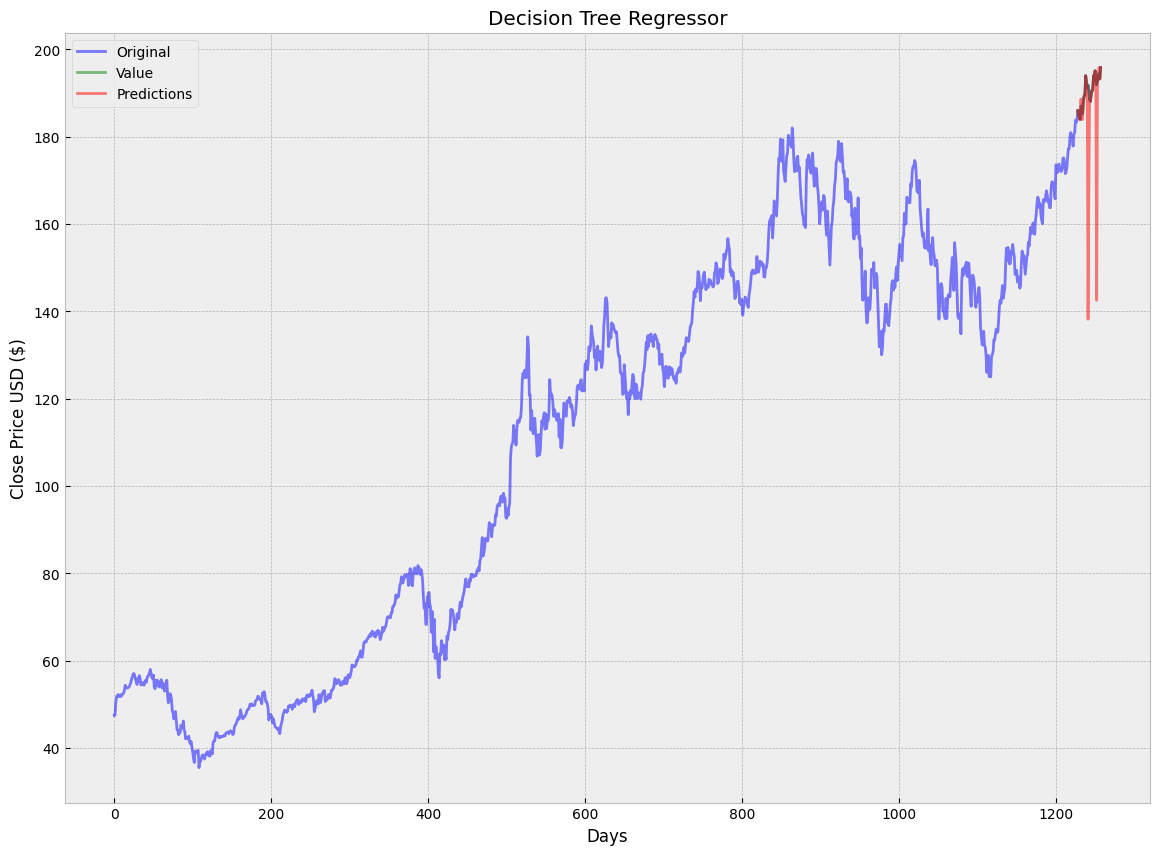

In [ ]:
#visualize the data

predictions = tree_prediction

valid = df[x.shape[0]:].copy()
valid.loc[:, 'Predictions'] = predictions

plt.figure(figsize=(14,10))
plt.title('Decision Tree Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'], color='blue', alpha=0.5)
plt.plot(valid['Close'], color='green', alpha=0.5)
plt.plot(valid['Predictions'], color='red', alpha=0.5)
plt.legend(['Original', 'Value', 'Predictions'])
plt.show()



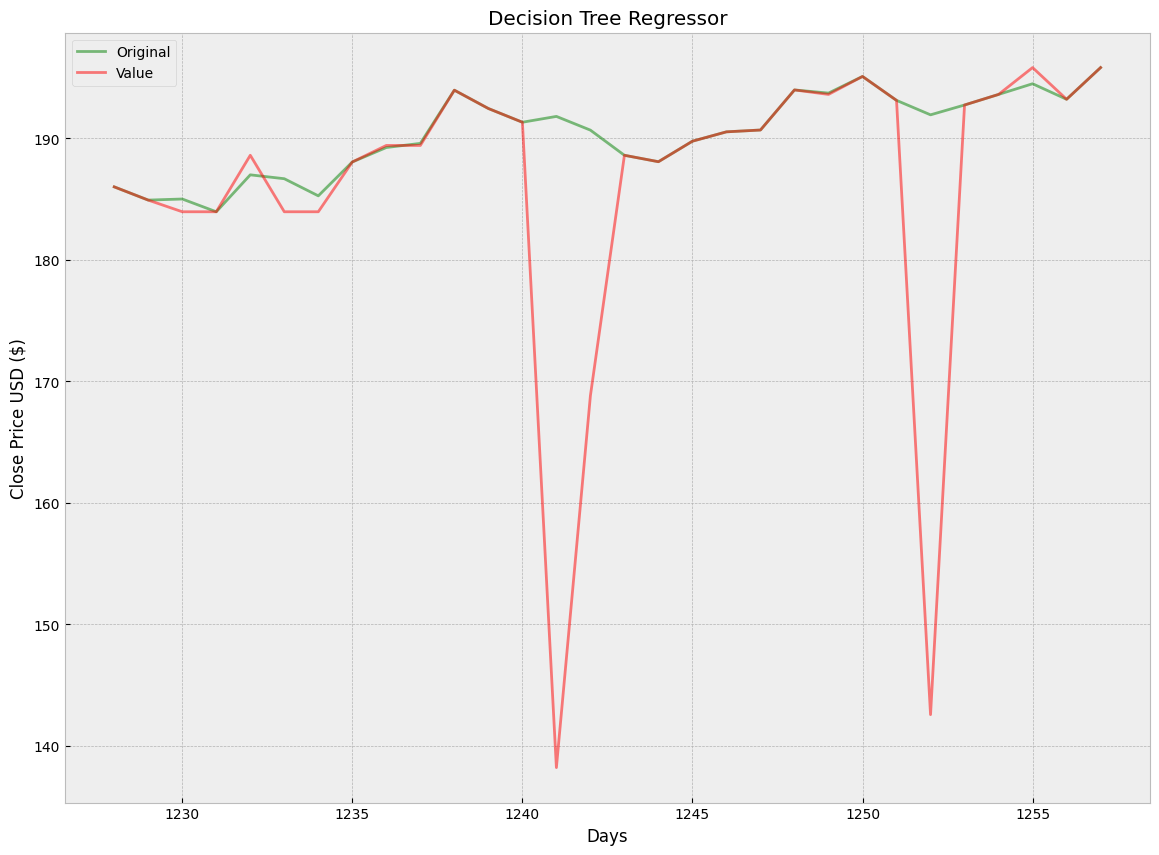

In [ ]:
plt.figure(figsize=(14,10))
plt.title('Decision Tree Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')

plt.plot(valid['Close'], color='green', alpha=0.5)
plt.plot(valid['Predictions'], color='red', alpha=0.5)
plt.legend(['Original', 'Value', 'Predictions'])
plt.show()

In [ ]:

mae = mean_absolute_error(valid['Close'], valid['Predictions'])
r2 = r2_score(valid['Close'], valid['Predictions'])
evs = explained_variance_score(valid['Close'], valid['Predictions'])


print("Decision Tree Regressor")
print("Mean absolute error : " + str(mae))
print("r2 score : " + str(r2))
print("explained_variance_score: " + str(evs))




Decision Tree Regressor
Mean absolute error : 4.443998733333335
r2 score : -16.378646605577817
explained_variance_score: -14.766557650057704


In [ ]:
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(tree, out_file ='tree.dot',
               feature_names =['Production Cost'])

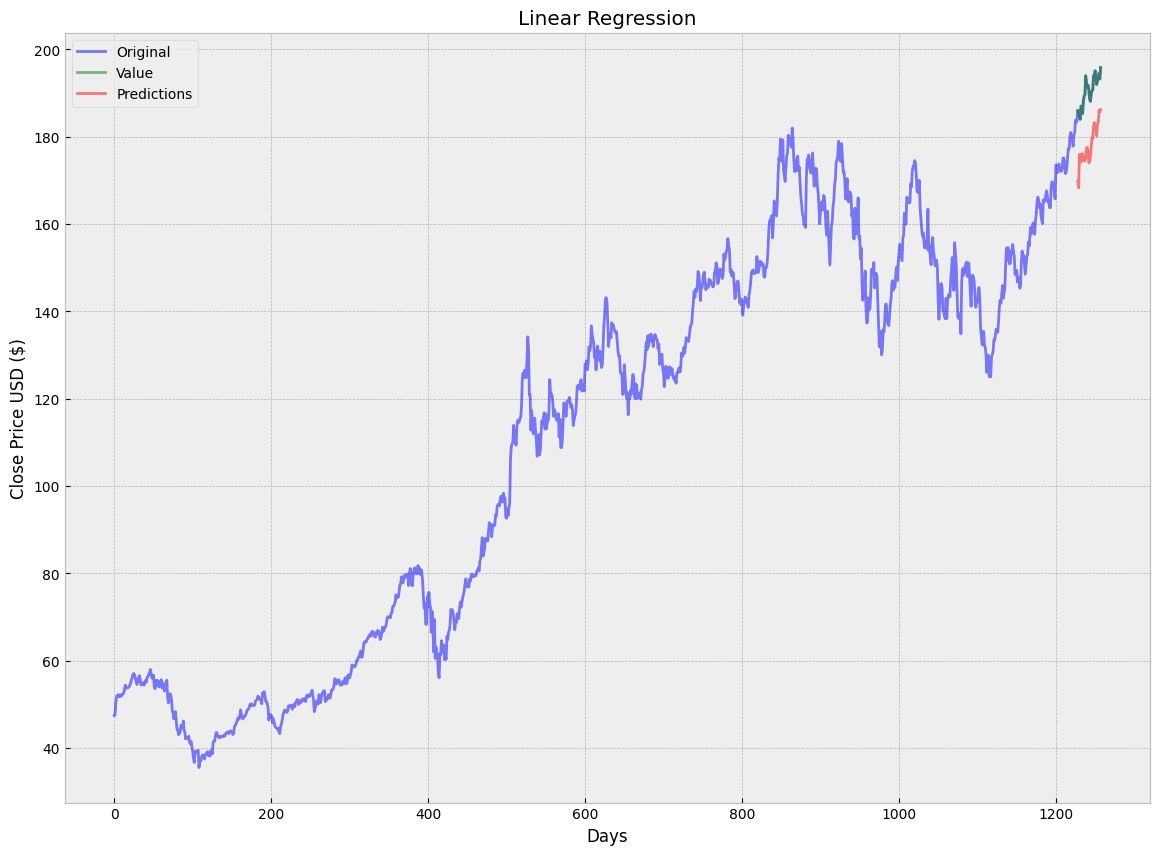

In [ ]:

predictions = linear_prediction

valid = df[x.shape[0]:].copy()
valid.loc[:, 'Predictions'] = predictions

plt.figure(figsize=(14,10))
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'], color='blue', alpha=0.5)
plt.plot(valid['Close'], color='green', alpha=0.5)
plt.plot(valid['Predictions'], color='red', alpha=0.5)

plt.legend(['Original', 'Value', 'Predictions'])
plt.show()


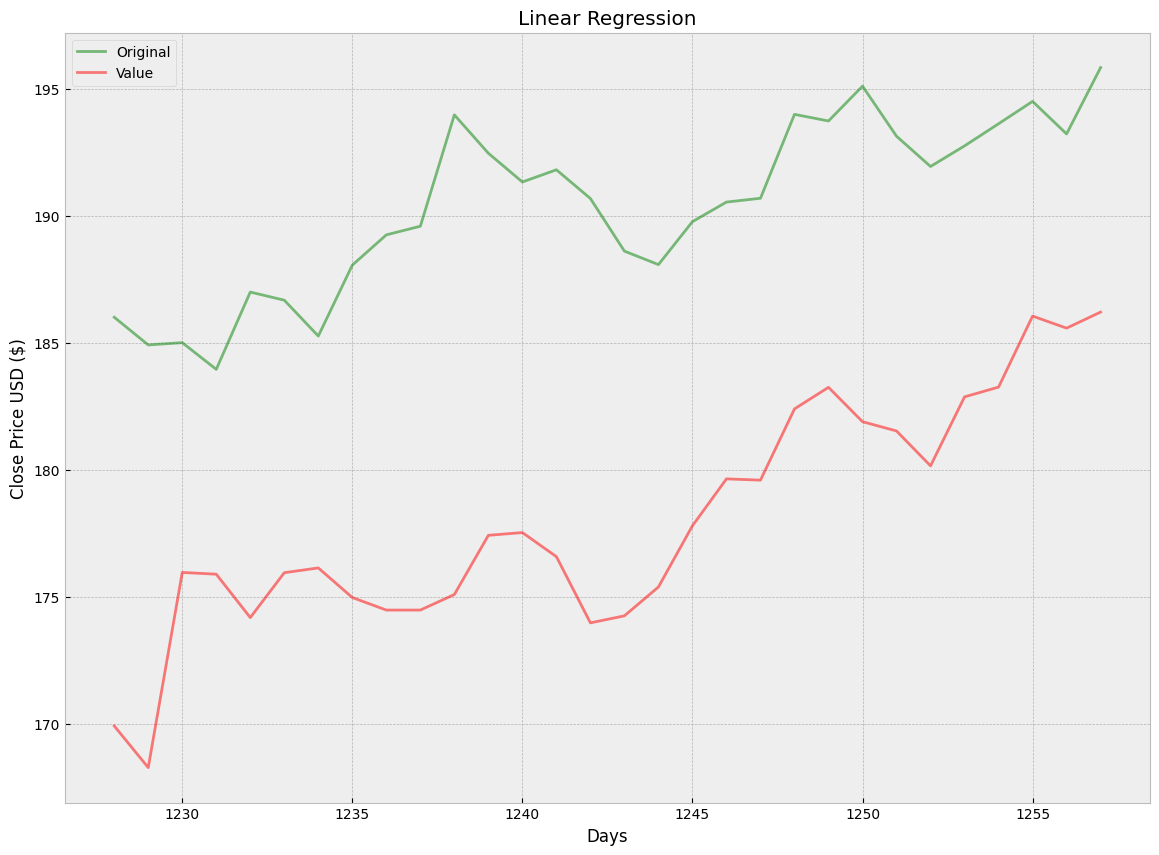

In [ ]:

valid = df[x.shape[0]:].copy()
valid.loc[:, 'Predictions'] = predictions

plt.figure(figsize=(14,10))
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid['Close'], color='green', alpha=0.5)
plt.plot(valid['Predictions'], color='red', alpha=0.5)

plt.legend(['Original', 'Value', 'Predictions'])
plt.show()

In [ ]:
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
r2 = r2_score(valid['Close'], valid['Predictions'])
evs = explained_variance_score(valid['Close'], valid['Predictions'])


print("Linear Regression")
print("Mean absolute error : " + str(mae))
print("r2 score : " + str(r2))
print("explained_variance_score: " + str(evs))


Linear Regression
Mean absolute error : 12.350134816501035
r2 score : -13.406016406136015
explained_variance_score: 0.2928326788065102
